In [10]:
import tweepy
import requests
import pandas as pd
import numpy as np
import json
import time
import math
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

# Gather The Data

### WeRateDog Archieve

In [3]:
# Import WeRateDogs Twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Image Recognition 

In [4]:
# Import tweet image predictions from server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)
    
df_image = pd.read_csv("image_predictions.tsv", sep='\t')

### Tweepy API

In [259]:
# Create Twitter API Connections
consumer_key = 'Enter Credentials Here'
consumer_secret = 'Enter Credentials Here'
access_token = 'Enter Credentials Here'
access_secret = 'Enter Credentials Here'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# Setup for the api call
tweet_id = df_archive.tweet_id
tweet_exist = []
tweet_deleted = []

In [8]:
#Setup timer
start = time.time() 

# Query the tiwtter API
with open('tweet_json.txt', 'w') as file:
    for tweet in tweet_id:
        try:
            # Get the data
            checker = api.get_status(tweet,tweet_mode='extended')
            json.dump(checker._json, file)
            file.write('\n')
            tweet_exist.append(tweet)
        except Exception as e:
            tweet_deleted.append(tweet)
            print(tweet,e)
            
#print end time
end = time.time()
print(end-start)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 [{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 654


754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 632


1958.5397889614105


In [9]:
#Conver json files to pandas
df_json = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

#Add tweet ID
df_json["tweet_id"] = [str(i) for i in tweet_exist]

# Assess The Data

### Basic checking for df_archieve

In [164]:
# Prints out the dataset
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<b>Defining the definition of each column</b> 

- **tweet_id** : Identifiy the id of a tweet
- **in_reply_to_status_id** : If the tweet is a reply, it will show the original tweet id
- **in_reply_to_status_id** : If the tweet is a reply, it will show the original id of the reply tweet
- **timestamp** : Records when the tweet was published
- **source** : Records where the tweet was created at
- **text** : The text contained in the of the tweet
- **retweeted_status_id** : If the tweet is a retweet, it will show the original tweet id
- **retweeted_status_id** : If the tweet is a retweet, it will show the original tweet of the retweet tweet
- **retweeted_status_user_id** : If the tweet is a retweet, it will show the original tweet of the retweet tweet
- **retweeted_status_timestamp** : Records where the retweet was created at
- **expanded_urls** : URL to access the tweet
- **rating_numerator** : Numerator of rating
- **rating_denominator** : Denomintor of rating
- **name** : Name of the dog
- **doggo**, **floofer**, **pupper**, **puppo** : Type of dog

In [165]:
# Check out the dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [166]:
# Check out datatype
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [167]:
# Checks for duplicated
df_archive[df_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [168]:
# Check for retweets
df_archive.loc[df_archive["retweeted_status_id"].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [169]:
# Checks if there are any tweets that cannot be queried
df_archive.loc[df_archive['tweet_id'].isin(tweet_deleted)].shape[0]

25

In [170]:
# Checks which tweet id isn't analyzed with image classification (df_image) dataset
df_archive.loc[-df_archive['tweet_id'].isin(df_image.tweet_id)].shape[0]

297

In [171]:
# Checks for all unique value in interesting columns
df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [172]:
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [173]:
# Describe the dataset
df_archive[["rating_numerator", "rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


### Basic checking for df_image

In [174]:
# Prints out the dataset
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [175]:
df_image.img_num.value_counts()

1    1767
2     195
3      66
4      31
Name: img_num, dtype: int64

<b>Defining the definition of each column</b> 

- **tweet_id** : Identifiy the id of a tweet
- **jpg_url** : Image URL 
- **img_num** : Categorizes the image, since there is 4 type, the value ranges from ranges from 1-4
- **p1**, **p2**, "**p3** : Algorithm Prediction
- **p1_conf**, **p2_conf**, **p3_conf** : Confidence level of the algrotihm
- **p1_dog**, **p2_dog**, **p4_dog** : Checks whether or not the the prediction is a breed of dog

In [176]:
# Check out the dataset
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2059 non-null object
jpg_url     2059 non-null object
img_num     2059 non-null int64
p1          2059 non-null object
p1_conf     2059 non-null float64
p1_dog      2059 non-null bool
p2          2059 non-null object
p2_conf     2059 non-null float64
p2_dog      2059 non-null bool
p3          2059 non-null object
p3_conf     2059 non-null float64
p3_dog      2059 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 166.9+ KB


In [177]:
# Check out datatype
df_image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [178]:
# Checks for duplicated
df_image[df_image.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Basic checking for df_json

In [179]:
df_json.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user,tweet_id
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36531,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,7774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",892420643555336193
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31474,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,5762,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",892177421306343426


<b>Defining the definition of each column</b> 

- **contributors** : Identifiy the id of a tweet
- **coordinates** : Represents the geographic location of this Tweet as reported by the user or client application
- **created_at** : UTC time when this Tweet was created
- **display_text_range** : Number of characters displayed
- **entities** : Entities which have been parsed out of the text of the Tweet
- **extended_entities** : When between one and four native photos or one video or one animated GIF are in Tweet, contains an array 'media' metadata
- **favorite_count** : Number of favourited
- **favorited** : Did user API accoutn favorited the tweet
- **full_text** : The text of the tweet
- **geo** : (depreciated attribute)
- **quoted_status** : This field only surfaces when the Tweet is a quote Tweet. This field contains the integer value Tweet ID of the quoted Tweet
- **quoted_status_id** : This field only surfaces when the Tweet is a quote Tweet. This field contains the integer value Tweet ID of the quoted Tweet
- **quoted_status_id_str** : This field only surfaces when the Tweet is a quote Tweet. This is the string representation Tweet ID of the quoted Tweet
- **quoted_status_permalink** : Link to quote tweet
- **retweet_count** : Retweet count
- **retweeted** : Did user API accoutn retweeted the tweet
- **source** : Utility used to post the Tweet, as an HTML-formatted string
- **truncated** : Indicates whether the value of the text parameter was truncated
- **user** : User


In [180]:
# Check out the dataset
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 33 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [181]:
# Check out datatype
df_image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [182]:
# Checks for duplicated
df_json[df_json.tweet_id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user,tweet_id


## Key Task
Since the main analysis will be done through df_archive, we will be analyzing df_archive table data quality and tidiness. We will then further add more columns from the other data that we think is necessary for the analysis.

#### Quality issues:
1. Incorrect datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id and timestamp columns)
2. Missing data as tweet_id(s) in df_archive and df_image are not queried 
3. HTML tags in df_archive sources
4. Text in df.text is contains link
5. Problems with numerator rating (numerator has absurldly large vale 1000+)
6. Problems with denominator rating (Rating denominator has incosistent value 10, some even 0)
7. Bad dog naming (lowercase)
9. Several records have more than one dog stage


#### Tidy Principle
9. No duplicates (retweet exist (which means that they are duplicated))
10. Dog stage(doggo, etc) should be in 1 column

**(Join other Columns)**
- Add breed prediction (p1 & p1_conf)
- retweet_count and favorite_count columns from status_df (tweet status),

**Note** : Some other issue in the other dataset
- Empty values in df_json for columns such as contributors, coordinates, etc (Privacy issue?)

# Clean The Data

In [696]:
# Create a copy 
df = df_archive.copy()
df_img = df_image.copy()
df_json2 = df_json.copy()

## Quality Issues

#### 1. Correcting datatypes

#### CODE

In [627]:
# Incorrect datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id and timestamp columns)
## Fill empty columns
df.in_reply_to_status_id = df.in_reply_to_status_id.fillna(0).astype(np.int64)
df.in_reply_to_user_id = df.in_reply_to_user_id.fillna(0).astype(np.int64)

## Change timestamp
df.timestamp = pd.to_datetime(df.timestamp)

## Change datatype
df.tweet_id = df.tweet_id.astype(str)
df.in_reply_to_status_id = df.in_reply_to_status_id.astype(str)
df.in_reply_to_user_id = df.in_reply_to_user_id.astype(str)
df.retweeted_status_id = df.retweeted_status_id.astype(str)
df.retweeted_status_user_id = df.retweeted_status_user_id.astype(str)

df.rating_numerator = df.rating_numerator.astype(int)

#### TEST

In [628]:
### CHECKING
df.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### 2. Removing Missing Data

#### CODE

In [629]:
# Missing data as tweet_id(s) in df_archive and df_image are not queried
## Remove missing rows in df
df = df[df.tweet_id.isin([str(i) for i in tweet_exist])]
## Remove missing rows in df_image
df_image = df_image[df_image.tweet_id.isin([str(i) for i in tweet_exist])]

#### TEST

In [670]:
### CHECKING
df[~df.tweet_id.isin([str(i) for i in tweet_exist])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,display_text_range,stages


In [671]:
df_image[~df_image.tweet_id.isin([str(i) for i in tweet_exist])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 3. Removing HTML Tags

#### CODE

In [632]:
# HTML tags in df_archive sources
df.source = df.source.apply(lambda x : BeautifulSoup(x, "lxml").text)

#### TEST

In [633]:
### CHECKING
df["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### 4. Remove links in text

#### CODE

In [634]:
df.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [635]:
# merge json file display_text_range column to df to extract text using range values
df = pd.merge(df, df_json[['tweet_id', 'display_text_range']], on='tweet_id')

In [636]:
# Loop through the project
new_text = []
new_display_text_range = []
for i, row in df.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    
    #Append the values
    new_text.append(display_text)
    new_display_text_range.append(text_range[1])
    
# Replace the data
df.text = new_text
df.display_text_range = new_display_text_range

#### TEST

In [637]:
### CHECKING
print(df.text[0])
print(df.text[1])
print(df.text[2])


This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


#### 5 | 6. Problems with Numerator and Denominator

#### CODE

In [672]:
# Problems with rating (numerator has absurldly large vale 1000+), (Rating denominator has incosistent value 10, some even 0) 

In [639]:
## Checks the value
df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2309
11        2
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [640]:
df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       157
10      458
11      464
12      552
13      339
14       51
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [641]:
## Remove rows that has 0 numerator or denominator
df = df.loc[df.rating_denominator != 0]
df = df.loc[df.rating_numerator != 0]


#Normalize the numerator and denominator to level 10
new_numerator = []
new_denominator = []

# Loops through the database
for key, i in df.iterrows():
    if (i.rating_denominator == 10):
        new_numerator.append(int(i.rating_numerator))
        new_denominator.append(int(i.rating_denominator))
    else :
        #Normalize the numerator and denominator
        new_numerator.append(int((i.rating_numerator*10)/i.rating_denominator))
        new_denominator.append(10)
            
# Replace the database
df.rating_numerator = new_numerator
df.rating_denominator = new_denominator

#### TEST

In [642]:
### CHECKING
df.rating_denominator.max()

10

#### 7. Fixing Names

#### CODE

In [643]:
## Replacing lowercase values with None
df['name'][df['name'].str.match('[a-z]+')] = 'None'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### TEST

In [644]:
### CHECKING
df[df['name'].str.match('[a-z]+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,display_text_range


In [662]:
k = ['Doggo', 'Pupper']
n = ' '.join([str(elem) for elem in k]) 

'Doggo Pupper'

#### 8.   Change Record with more than 1 dog stage

#### CODE

In [663]:
# Prepare Change Record
new_dog_list = []
for key, i in df.iterrows():
    temp_list = []
    number_track = 0
    if (i.doggo != "None"):
        temp_list.append("Doggo")
        number_track += 1
    if (i.floofer != "None"):
        temp_list.append("Floofer")
        number_track += 1
    if (i.pupper != "None"):
        temp_list.append("Pupper")
        number_track += 1
    if (i.puppo != "None"):
        temp_list.append("Puppo")
        number_track += 1

    if (number_track == 0):
        temp_list.append("None")
        
    final_string = ' '.join([str(elem) for elem in temp_list]) 
    
    new_dog_list.append(final_string)

In [685]:
df['stages'] = np.array(new_dog_list)

#### TEST

In [686]:
df['stages'].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo Puppo',
       'Doggo Floofer', 'Doggo Pupper'], dtype=object)

## Tidiness Issues

#### 7. Removing Duplicates

#### CODE

In [647]:
## 8. No duplicates (retweet exist (which means that they are duplicated))
df = df[df.retweeted_status_id == 'nan']

## Dropping retweet columns
df.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### TEST

In [683]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'display_text_range', 'stages'],
      dtype='object')

#### 8. Combining Dog Stage

#### CODE

In [688]:
## 9. Dog stage(doggo, etc) should be in 1 column
df.stages = df.stages.astype('category')
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### TEST

In [689]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'display_text_range', 'stages'],
      dtype='object')

## Joining Other Columns

#### Join from df_json

In [690]:
# Adding favourite_count, retweet_count into df from df_json
df = pd.merge(df, df_json[['tweet_id', 'retweet_count', 'favorite_count']], on='tweet_id')

#### Join from df_image

In [691]:
# Convert df_image tweetid to str
df_image.tweet_id = [str(i) for i in df_image.tweet_id]

# Adding prediction data (p1, p1_conf, p1_dog)
df = pd.merge(df, df_image[['tweet_id', 'p1', 'p1_conf', 'p1_dog']], on='tweet_id')

# rename columns
df = df.rename(columns={"p1": "dog_breed", "p1_conf": "confidence", "p1_dog":"is_dog"})


#### Dropping unused columns

In [692]:
df.drop(["expanded_urls"], axis=1, inplace=True)

#### Binning User Based on Numerator

In [693]:
bin_edges = [1, 10, df.rating_numerator.max() ]
bin_names = ['below 10', 'above_10']

In [694]:
df['rating_category'] = pd.cut(df['rating_numerator'], bin_edges, labels=bin_names)

#### Exporting

In [695]:
df.to_csv("cleaned.csv", index=False)

# Analyzing 

### Basic Analysis

In [527]:
# Loading
df = pd.read_csv("cleaned.csv")

# Convert str to datetime
df.timestamp = pd.to_datetime(df.timestamp)


In [528]:
# Checks the information of the new column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 17 columns):
tweet_id                 1974 non-null int64
in_reply_to_status_id    1974 non-null int64
in_reply_to_user_id      1974 non-null int64
timestamp                1974 non-null object
source                   1974 non-null object
text                     1974 non-null object
rating_numerator         1974 non-null int64
rating_denominator       1974 non-null int64
name                     1974 non-null object
display_text_range       1974 non-null int64
stages                   1974 non-null object
retweet_count            1974 non-null int64
favorite_count           1974 non-null int64
dog_breed                1974 non-null object
confidence               1974 non-null float64
is_dog                   1974 non-null bool
rating_category          1970 non-null object
dtypes: bool(1), float64(1), int64(8), object(7)
memory usage: 248.8+ KB


In [529]:
# Checks how many tweets are reply or non reply
print("Value Counts:")
print("Non reply : {}".format(df[df.in_reply_to_status_id == 0].shape[0]))
print("With reply : {}".format(df[df.in_reply_to_status_id != 0].shape[0]))

Value Counts:
Non reply : 1953
With reply : 21


In [530]:
# Checks which sources the tweet came from
print("Value Counts:")

df['source'].value_counts()

Value Counts:


Twitter for iPhone    1936
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [531]:
# Checks which sources the tweet came from
print("Value Counts")
df['rating_numerator'].value_counts().sort_index()

Value Counts


1         4
2        10
3        19
4        15
5        33
6        33
7        51
8        96
9       151
10      419
11      400
12      447
13      255
14       35
26        1
27        1
34        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

### All user rating

In [532]:
print("Length : {}".format(df.shape[0]))

Length : 1974


In [533]:
# Checks numerator
print("Average numerator  : {}".format(df.rating_numerator.mean()))

Average numerator  : 11.70466058763931


In [534]:
# Check average tweet length
print("Average tweet length : {}".format(df.display_text_range.mean()))

Average tweet length : 111.5709219858156


In [535]:
# Checks the mean of retweet/ favourite
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	2467
Mean Favorite Count	8306


In [536]:
# Checks value counts for each type
print('Doggo')
print('Mean Retweet :', 
                  round(df.retweet_count[df.stages == 'doggo'].mean()))
print('Mean Favorite :', 
                  round(df.favorite_count[df.stages == 'doggo'].mean()))

print('Puppo')
print('Mean Retweet :', 
                  round(df.retweet_count[df.stages == 'puppo'].mean()))
print('Mean Favorite :', 
                  round(df.favorite_count[df.stages == 'puppo'].mean()))

print('Pupper')
print('Mean Retweet :', 
                  round(df.retweet_count[df.stages == 'pupper'].mean()))
print('Mean Favorite :', 
                  round(df.favorite_count[df.stages == 'pupper'].mean()))


print('Floofer')
print('Mean Retweet :', 
                  round(df.retweet_count[df.stages == 'floofer'].mean()))
print('Mean Favorite :', 
                  round(df.favorite_count[df.stages == 'floofer'].mean()))

Doggo
Mean Retweet : 6600
Mean Favorite : 19067
Puppo
Mean Retweet : 5886
Mean Favorite : 21152
Pupper
Mean Retweet : 2113
Mean Favorite : 6735
Floofer
Mean Retweet : 4400
Mean Favorite : 12186


### User who rates less than or equal to 10

In [537]:
df_less_10 = df[df['rating_numerator'] <= 10]
print("Length : {}".format(df_less_10.shape[0]))


Length : 831


In [538]:
# Checks numerator
print("Average numerator  : {}".format(df_less_10.rating_numerator.mean()))

Average numerator  : 8.637785800240675


In [539]:
# Check average tweet length
print("Average tweet length : {}".format(df_less_10.display_text_range.mean()))

Average tweet length : 118.80625752105897


In [540]:
# Checks the mean of retweet/ favourite
print('%s\t%s' % ('Mean Retweet Count', round(df_less_10.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df_less_10.favorite_count.mean())))

Mean Retweet Count	1128
Mean Favorite Count	3211


In [541]:
print('Doggo')
print('Mean Retweet :', 
                  round(df_less_10.retweet_count[df.stages == 'doggo'].mean()))
print('Mean Favorite :', 
                  round(df_less_10.favorite_count[df.stages == 'doggo'].mean()))

print('Puppo')
print('Mean Retweet :', 
                  round(df_less_10.retweet_count[df.stages == 'puppo'].mean()))
print('Mean Favorite :', 
                  round(df_less_10.favorite_count[df.stages == 'puppo'].mean()))

print('Pupper')
print('Mean Retweet :', 
                  round(df_less_10.retweet_count[df.stages == 'pupper'].mean()))
print('Mean Favorite :', 
                  round(df_less_10.favorite_count[df.stages == 'pupper'].mean()))


print('Floofer')
print('Mean Retweet :', 
                  round(df_less_10.retweet_count[df.stages == 'floofer'].mean()))
print('Mean Favorite :', 
                  round(df_less_10.favorite_count[df.stages == 'floofer'].mean()))

Doggo
Mean Retweet : 1803
Mean Favorite : 5674
Puppo
Mean Retweet : 1184
Mean Favorite : 4731
Pupper
Mean Retweet : 1105
Mean Favorite : 3141
Floofer
Mean Retweet : 1023
Mean Favorite : 3697


### User who rates more than 10

In [542]:
df_more_10 = df[df['rating_numerator'] > 10]
print("Length : {}".format(df_more_10.shape[0]))


Length : 1143


In [543]:
# Check average tweet length
print("Average tweet length : {}".format(df_more_10.display_text_range.mean()))

Average tweet length : 106.31058617672791


In [544]:
# Checks the mean of retweet/ favourite
print('%s\t%s' % ('Mean Retweet Count', round(df_more_10.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df_more_10.favorite_count.mean())))

Mean Retweet Count	3441
Mean Favorite Count	12011


In [545]:
print('Doggo')
print('Mean Retweet :', 
                  round(df_more_10.retweet_count[df.stages == 'doggo'].mean()))
print('Mean Favorite :', 
                  round(df_more_10.favorite_count[df.stages == 'doggo'].mean()))

print('Puppo')
print('Mean Retweet :', 
                  round(df_more_10.retweet_count[df.stages == 'puppo'].mean()))
print('Mean Favorite :', 
                  round(df_more_10.favorite_count[df.stages == 'puppo'].mean()))

print('Pupper')
print('Mean Retweet :', 
                  round(df_more_10.retweet_count[df.stages == 'pupper'].mean()))
print('Mean Favorite :', 
                  round(df_more_10.favorite_count[df.stages == 'pupper'].mean()))


print('Floofer')
print('Mean Retweet :', 
                  round(df_more_10.retweet_count[df.stages == 'floofer'].mean()))
print('Mean Favorite :', 
                  round(df_more_10.favorite_count[df.stages == 'floofer'].mean()))

Doggo
Mean Retweet : 7415
Mean Favorite : 21341
Puppo
Mean Retweet : 6931
Mean Favorite : 24801
Pupper
Mean Retweet : 2853
Mean Favorite : 9377
Floofer
Mean Retweet : 4963
Mean Favorite : 13601


# Visualizing Data

In [546]:
plt.rcParams["figure.figsize"] = [6, 4]

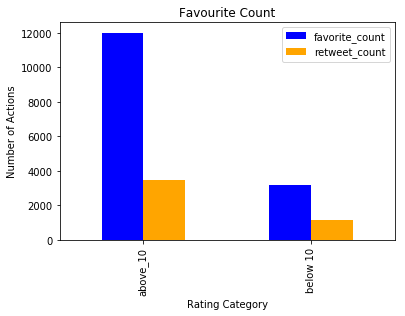

In [547]:
# Visualize the Count in both group
count = df.groupby("rating_category")[["favorite_count", "retweet_count"]].mean()
ax = count.plot(kind="bar", title="Favourite Count", color=["blue", "orange"])
ax.set_xlabel("Rating Category")
ax.set_ylabel("Number of Actions");
plt.savefig('./graphs/count', bbox_inches = "tight")


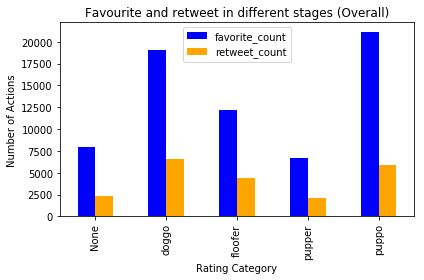

In [548]:
# Visualize the Stages Count
stages = df.groupby(["stages"])[["favorite_count", "retweet_count"]].mean()
ax = stages.plot(kind="bar", title="Favourite and retweet in different stages (Overall)", color=["blue", "orange"])
ax.set_xlabel("Rating Category")
ax.set_ylabel("Number of Actions");
plt.tight_layout()

plt.savefig('./graphs/stages_count', bbox_inches = "tight")


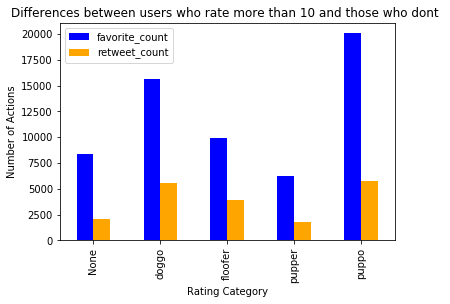

In [549]:
# Visualize the Differences of Stages Count in both group
stages2 = df_more_10.groupby(["stages"])[["favorite_count", "retweet_count"]].mean()-df_less_10.groupby(["stages"])[["favorite_count", "retweet_count"]].mean()
ax = stages2.plot(kind="bar", title="Differences between users who rate more than 10 and those who dont ", color=["blue", "orange"])
ax.set_xlabel("Rating Category")
ax.set_ylabel("Number of Actions");
plt.savefig('./graphs/stages_diff_count', bbox_inches = "tight")


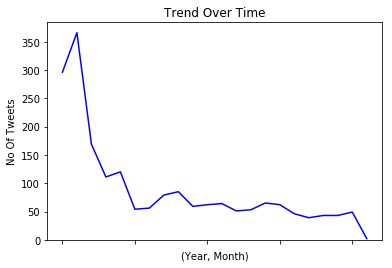

In [559]:
# Visualize the Trend of the tweet
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='Trend Over Time', color="blue")
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("No Of Tweets")
ax.set_ylim(0, );
plt.savefig('./graphs/trends')


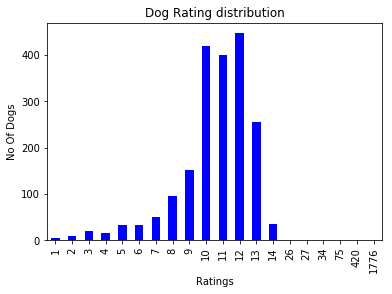

In [551]:
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution', color="blue")
ax.set_xlabel("Ratings")
ax.set_ylabel("No Of Dogs")
plt.savefig('./graphs/rating_list')


AttributeError: Can only use .dt accessor with datetimelike values

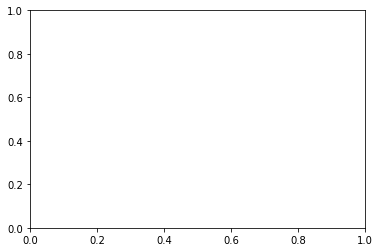

In [552]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line', color="blue")
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line', color="orange").set_ylim(0, )
plt.title('Retweeting and Favoriting trend')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('./graphs/ret_fav')


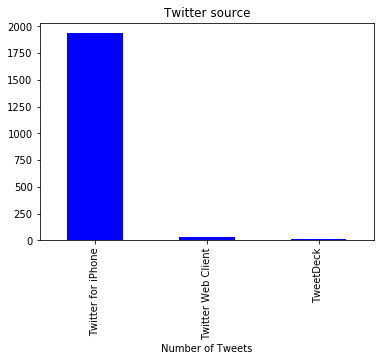

In [553]:
df['source'].value_counts().plot('bar', title='Twitter source', color="blue").set_xlabel("Number of Tweets")
plt.savefig('./graphs/source')
